<p align= " center"> <strong>MULTIPLE LINEAR REGRESSION MODEL</p>

<p><b>By: Jefferson C.</b></p>

---

### __Multiple Linear Regression (MLR)__
La regresión lineal multiple modela la relación entre una variable respuesta $Y$ y varias variables explicativas $X_1, X_2, \dots , X_n$.

Separamos lo sistemático (explicado por $X$) de lo no explicado (explicado por error)

__Population Model__

definimos a la esperanza de $Y$ como :
$$ \mu(X) = \mathbb{E}[Y|X_1,X_2,\dots,X_k]\qquad \equiv \qquad\mu(X) ={\beta}_0 + {\beta}_1 {X}_1 + {\beta}_2 {X}_2 +\dots + \beta_k {X}_k $$

por tanto el modelo poblacional: 

$$Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \dots + \beta_k X_{ki} + u_i$$

en su forma matricial :

$$ Y = X\beta + u $$

donde: 

- $Y$ : Vector de observaciones
- $X$ : matriz de diseño (incluye columna de unos para el intercepto)
- $\beta$ : Vector de coeficientes poblacionales $({\beta}_0, {\beta}_1, \dots, \beta_k)$
- $u$ : Vector de errores ($u \sim N(0,\sigma^2I)$)

__Sampling Model__

Función de regresión (por observación):
$$\hat{Y_i} = \hat{\beta}_0 + \hat{\beta}_1 X_{1i} + \hat{\beta}_2 X_{2i} + \dots + \hat{\beta}_k X_{ki}$$

Ecuación de regresión (forma matricial):
$$Y = \hat{Y} + e \quad\leftrightarrow\qquad Y = X \hat{\beta} + e$$

los residuales se definen como :
$$e = Y - \hat{Y} $$

donde:
- $\hat{Y}$ : Vector de observaciones estimadas
- $X$ : matriz de diseño (incluye columna de unos para el intercepto)
- $\beta$ : Vector de coeficientes estimados $({\hat{\beta}_0}, \hat{{\beta}_1}, \dots, \hat{\beta_k} )$ 
- $e$ : Vector de residuales

In [3]:
# DATA

import geopandas as gpd 
data = gpd.read_file("../Data Bases/airbnb/airbnb_Chicago 2015.shp")

In [4]:
# LINEAR REGRESSION MODEL (OLS)

import statsmodels.api as sm

# Independent Variable 
X = data[['num_crimes','num_spots']]
# Dependent Variable 
Y = data['income_pc']

# Intercept 
X_const = sm.add_constant(X)

# Model and adjusted values 
model = sm.OLS(Y, X_const).fit()

# results
print(model.summary())

# Residuals 
data['RESIDUALS']= model.resid

# fitted values 
data['FITTED_VALUES'] = model.fittedvalues

                            OLS Regression Results                            
Dep. Variable:              income_pc   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     31.89
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           1.03e-10
Time:                        22:45:39   Log-Likelihood:                -826.73
No. Observations:                  77   AIC:                             1659.
Df Residuals:                      74   BIC:                             1666.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.375e+04   2001.875     11.864      0.0

### __Assumptions__


### __1. Specification__

__Def.__

Prueba para detectar __(mala especificación de forma funcional y/o no linealidad omitida)__ posibles variables omitidas de manera indirecta, solo detecta posibles problemas de especificación.

__Mathematical Formulation__

Modelo Base (Poblacional)
$$Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \dots + \beta_k X_{ki} + u_i$$

Modelo Auxiliar:

- __Regression Specification Error Test (Ramsey RESET)__
$$Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \dots + \beta_k X_{ki} + \qquad +\qquad{\delta_1}\hat{Y}_{i}^2 +\delta_2\hat{Y}_i^3 +\dots +\delta_{m-1}\hat{Y}_i^m\qquad +v_i$$

__Hypothesis:__
$$H_0) \qquad \text{El modelo \textbf{no tiene} problemas de especificación} \qquad({\delta_1} = {\delta_2} = \dots = {\delta_{m-1}}= 0)$$
$$H_1) \qquad \text{El modelo \textbf{tiene} problemas de especificación} \qquad (\exist j  \text{ tal que }\delta_j \neq 0)$$

__Test - Decision__

- $\text{p-value} < \alpha \to $ Rechazar $H_0$ (Evidencia de mala especificación)
- $\text{p-value} \ge \alpha \to $ No rechazar $H_0$ (No evidencia de mala especificación)

In [5]:
# RESET TEST

from statsmodels.stats.diagnostic import linear_reset

# Test
reset_test = linear_reset(model)

# Decision
print(f"RESET TEST \n")
print(f"F stat  : {reset_test.statistic:.4f}")
print(f"p-value : {reset_test.pvalue:.4f}\n")

alpha = 0.05
if reset_test.pvalue < alpha:
    print("Reject H0: evidence of specification issues (possible nonlinearity/omitted variables).")
else:
    print("Fail to reject H0: no evidence of specification issues.")

RESET TEST 

F stat  : 173.3887
p-value : 0.0000

Reject H0: evidence of specification issues (possible nonlinearity/omitted variables).


### __2. Normality__

En el modelo clásico, la normalidad se asume para el error poblacional $u$, en la práctica se evalúa con los residuales $e$ (porque $u$ no se observa).

__Mathematical Formulation__

$$e \sim N(0, \sigma^2I)$$
donde : 
- $e \to$ vector de residuales 
- $\mathbb{E[e]} =  0_{n\times1} \to$ vector de la media igual a cero
- $\sigma^2 \to$ parámetro de varianza
- $I \to$ matrix identidad ($n \times n$ )


__Hypothesis__
- $H_0)$ Los residuales siguen una distribución aproximadamente normal 
$$H_0: e \sim N(0, \sigma^2I)$$

- $H_1)$ Los residuales no siguen una distribución aproximadamente normal 
$$H_1: e \nsim N(0, \sigma^2I)$$

__Test - Decision__
- Aplicar test según la naturaleza de los datos
- __Jarquer Bera__ (más general)
    - $\text{p-value} < \alpha \to $ Rechazar $H_0$ (Evidencia de no normalidad)
    - $\text{p-value} \ge \alpha \to $ No rechazar $H_0$ (No evidencia de no normalidad)
- __QQ plot__
    - Puntos separados de la recta (evidencia de No Normalidad)
    - puntos sobre la recta (No evidencia de NO Normalidad)

In [6]:
# JARQUER BERA TEST 

from scipy.stats import jarque_bera

# Test
jb_test = jarque_bera(data['RESIDUALS'])

# Decision 
print(f"JARQUE BERA TEST \n ")
print(f"JB stat  : {jb_test.statistic:.4f}")
print(f"p-value  : {jb_test.pvalue:.4f}\n")

alpha = 0.05
if jb_test.pvalue < alpha:
    print("Reject H0: residuals are not normally distributed.")
else:
    print("Fail to reject H0: no evidence against normality.")

JARQUE BERA TEST 
 
JB stat  : 24.5988
p-value  : 0.0000

Reject H0: residuals are not normally distributed.


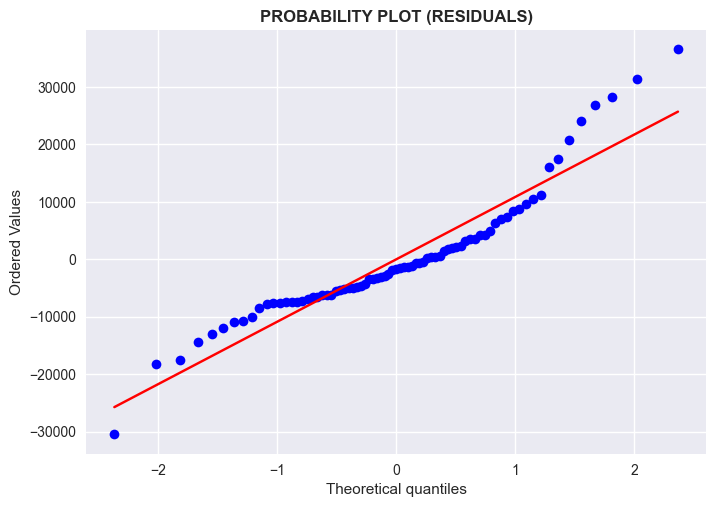

In [20]:
# QQ PLOT

import scipy.stats as stats 
import matplotlib.pyplot as plt

# Graph
plt.style.use('seaborn-v0_8')
stats.probplot(data['RESIDUALS'],dist='norm',plot=plt)
plt.title('PROBABILITY PLOT (RESIDUALS)',fontweight='bold')
plt.show()

### __3. Homoscedasticity__

__Def.__

En el modelo poblacional se asume que la varianza del error estocástico debe ser constante por tanto, en el modelo muestral podemos decir que los residuales deben tener varianza aproximadamente constante.

__Mathematical Formulation__
$$ Var(e|X)\approx \sigma^2 $$

donde : 

- $e\to$ vector de los residuales 
- $\sigma^2 \to $ parámetro de la varianza 
- $X \to$ Matrix de diseño (incluye columnas de unos para el intercepto)

__Hypothesis__

- $H_0: $ la varianza de los residuales es constante (homocedasticidad)
$$H_0 : Var(e|X)= \sigma^2$$

- $H_1: $ al menos una de las varianzas de los residuales es diferente (heterocedasticidad)
$$H_1 : Var(e|X)\neq \sigma^2$$

__Test__
- aplicar según la naturaleza de los datos
    - __Breusch Pagan__ (mas común)
    - __White__ (mas general)
        - $p-value < \alpha \to$ Rechazar $H_0$ (evidencia de heterocedasticidad)
        - $p-value \geq \alpha \to$ No rechazar $H_0$ (No evidencia de heterocedasticidad)
- Gráfico de __residuales vs valores ajustados__ (opcional)
    - patrón aleatorio (No evidencia de heterocedasticidad)
    - patrón detectado (evidencia de heterocedasticidad)

In [8]:
# BREUSCH PAGAN 

from statsmodels.stats.diagnostic import het_breuschpagan

# Test
lm_stat,lm_pvalue,f_stat,f_pvalue = het_breuschpagan(data['RESIDUALS'],X_const)

# Results - Decision
print(f"BREUSCH PAGAN TEST\n")
print(f"LM stat  : {lm_stat:.4f}")
print(f"LM p-val : {lm_pvalue:.4f}")
print(f"F stat   : {f_stat:.4f}")
print(f"F p-val  : {f_pvalue:.4f}\n")

alpha = 0.05
if lm_pvalue <alpha:
    print("Reject H0: variance is not constant (heteroscedasticity).")
else:
    print("Fail to reject H0: variance is constant (homoscedasticity).")

BREUSCH PAGAN TEST

LM stat  : 19.0619
LM p-val : 0.0001
F stat   : 12.1732
F p-val  : 0.0000

Reject H0: variance is not constant (heteroscedasticity).


In [9]:
# WHITE TEST 

from statsmodels.stats.diagnostic import het_white

# Test 
lm_stat, lm_pvalue, f_stat, f_pvalue = het_white(data['RESIDUALS'],X_const)

# Results - Decision
print(f"WHITE TEST\n")
print(f"LM stat  : {lm_stat:.4f}")
print(f"LM p-val : {lm_pvalue:.4f}")
print(f"F stat   : {f_stat:.4f}")
print(f"F p-val  : {f_pvalue:.4f}\n")

alpha = 0.05
if lm_pvalue <alpha:
    print("Reject H0: variance is not constant (heteroscedasticity).")
else:
    print("Fail to reject H0: variance is constant (homoscedasticity).")

WHITE TEST

LM stat  : 23.8821
LM p-val : 0.0002
F stat   : 6.3844
F p-val  : 0.0001

Reject H0: variance is not constant (heteroscedasticity).


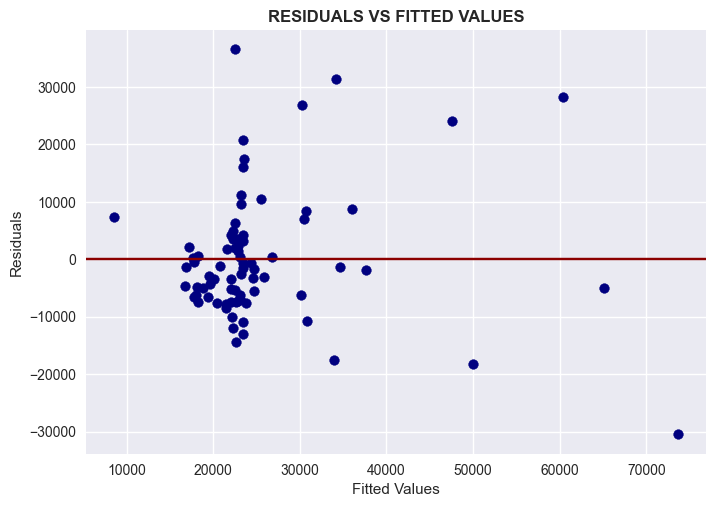

In [10]:
# RESIDUALS VS FITTED VALUES GRAPH

import seaborn as sns 
import matplotlib.pyplot as plt 

# Graph
plt.style.use('seaborn-v0_8')
plt.scatter(x=data['FITTED_VALUES'],y=data['RESIDUALS'],color='navy')
plt.title('RESIDUALS VS FITTED VALUES',fontweight = 'bold')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y =0,color="darkred")
plt.show()

### __3. Exogeneity - Independence__

- __EXOGENEITY__

__Def.__

Este supuesto implica que el término del error no tenga relación alguna con los regresores, por tanto:

En el modelo poblacional se asume que la esperanza de la matrix de diseño ($X$) y el error estocástico debe ser igual a cero.

__Mathematical Formulation__
$$ \mathbb{E}(u|X) = 0 $$

donde : 

- $u\to$ término del error.
- $X \to$ Matrix de diseño (incluye columnas de unos para el intercepto).

__Consideraciones__

En el modelo poblacional se asume que la esperanza del error condicionada a $X$ es cero. En la práctica trabajamos con residuales $e$ porque $u$ no se observa, pero esto no permite verificar exogeneidad directamente.

La validación de este suesto se realiza de manera implicita, como recomendación práctica aplicar variables instrumentales sobre la variable la cual se sospecha endogeneidad y comparar con un modelo mas robusto (ej. 2SLS), por limitaciones de este curso solo revisaremos este supuesto de manera conceptual.

- __INDEPENDENCE__

__Def.__

Este supuesto considera 2 tipos de datos:

- Corte Transversal : Observa la data en un periodo en concreto.
- Series de tiempo  : Observa la data en serie de periodos. 

En el modelo poblacional se asume independencia entre errores, en la practica se evalúa con los residuales $e$

- Corte Transversal : El ruido que quedó en una observación no ayuda a predecir el ruido de otra
- Series de tiempo  : Un shock hoy no puede venir acompañado del mañana (no autocorrelación) 

__Mathematical Formulation__

1. __corte Transversal__

Independencia (fuerte)
$$e_i \bot e_j | X, \qquad i \neq j$$
No correlación en errores (general)
$$ \text{Cov}(e_i,e_j|X) = 0, \qquad i \neq j$$
donde:
- $ e_i $ : residual de la observación i
- $ e_j $ :  residual de la observación j
- $ X $ : matriz de diseño (incluye columnas de unos para el intercepto)

2. __Series de tiempo__
$$ \text{Corr}( e_t,e_{t-s} | X) = 0 \qquad \forall s \neq 0$$
para el primer orden:
$$ \text{Corr}( e_t,e_{t-1} | X) = 0 $$

donde:
- $ e_t $ : residual en el tiempo $t$
- $ e_{t-1} $ :  residual en el tiempo anterior $t-1$ 
- $ X $ : matriz de diseño (incluye columnas de unos para el intercepto)

__Test__
La validación de este suesto se realiza con supuestos típicos: 

1. __Corte Transversal__

Se asume inicialmente, pero puede fallar si se presenta:
- Correlación espacial
- Agrupamientos o mediciones repetidas

2. __Series de tiempo__


- Durbin Watson : para autocorrelación de 1er orden
    - $d \approx 2 \to$ No autocorrelación
    - $d < 2 \to$ autocorrelación positiva
    - $d > 2 \to$ autocorrelación negativa
- Breusch–Godfrey : más general (permite varios rezagos y modelos con variables rezagadas).
- Ljung-Box : prueba autocorrelación conjunta en varios rezagos sobre residuales.

__Hypothesis__

2. __Series de tiempo__

$$H_o) \text{ No autocorrelación}$$
$$H_1) \text{ Autocorrelación}$$

__Decision__
- Breusch-Godfrey / Ljung-Box
    - $p-value < \alpha \to$ Rechazar $H_0$ (evidencia de autocorrelación)
    - $p-value \geq \alpha \to$ No rechazar $H_0$ (No evidencia de  autocorrelación)

In [ ]:
# DURBIN WATSON TEST

from statsmodels.stats.stattools import durbin_watson

# Test
dw_stat = durbin_watson(data['RESIDUALS'])

# Results - Decision
print(f'DURBIN - WATSON TEST \n Statistic: {dw_stat:.4f}\n')

tolerance = 0.01
if abs(dw_stat-2)<tolerance :
    print(" No autocorrelation")
elif dw_stat<2 :
    print("Positive Autocorrelation")
elif dw_stat>2:
    print("Negative Autocorrelation")

DURBIN - WATSON TEST 
 Statistic: 1.7140

Positive Autocorrelation


In [ ]:
# BREUSCH GODFREY TEST

from statsmodels.stats.diagnostic import acorr_breusch_godfrey

# Test
n_lags = 4
bg_lm, bg_lm_p, bg_f, bg_f_p = acorr_breusch_godfrey(model, nlags=n_lags)

# Results - Decision
print(f'BREUSCH - GODFREY TEST')
print("\n  nlags = {}".format(n_lags))
print(f"  LM stat   : {bg_lm:.6f}")
print(f"  LM p-value: {bg_lm_p:.6g}")
print(f"  F stat    : {bg_f:.6f}")
print(f"  F p-value : {bg_f_p:.6g}\n")

alpha = 0.05
if bg_f_p <alpha:
    print("Reject H0: Autocorrelation.")
else:
    print("Fail to reject H0: No autocorrelation.")

BREUSCH - GODFREY TEST

  nlags = 4
  LM stat   : 4.232017
  LM p-value: 0.375515
  F stat    : 1.017759
  F p-value : 0.40426

Fail to reject H0: No autocorrelation.


In [57]:
# LJUNG- BOX TEST

from statsmodels.stats.diagnostic import acorr_ljungbox

# Test
# list of lags
lb_lags = [1, 2, 4, 8, 12]
lb_df = acorr_ljungbox(data['RESIDUALS'], lags=lb_lags, return_df=True)

# Results - Decision
print("LJUNG - BOX TEST\n")
alpha = 0.05
lb_df['Decision'] = lb_df['lb_pvalue'].apply(
    lambda p:'Reject H0 : Autocorrelation' if p < alpha else 'Fail to Reject H0 : No Autocorrelation')
print(lb_df)

LJUNG - BOX TEST

      lb_stat  lb_pvalue                                Decision
1    1.294537   0.255214  Fail to Reject H0 : No Autocorrelation
2    2.590083   0.273887  Fail to Reject H0 : No Autocorrelation
4    5.761940   0.217646  Fail to Reject H0 : No Autocorrelation
8    8.339920   0.400990  Fail to Reject H0 : No Autocorrelation
12  12.498739   0.406501  Fail to Reject H0 : No Autocorrelation


### __5. Multicolineality__

__Def.__

Se asume no multicolinealidad perfecta entre regresores (no redundancia lineal exacta).

Para estimar los coeficientes, usamos la transpuesta de las variables multiplicada por las mismas. Si esta matriz es invertible, tenemos una solución única para los coeficientes. Si no, no existe solución única para OLS.

__Mathematical Formulation__
$$ rank(X) = k+1 \leftrightarrow (X'X) \text{ es invertible} $$

donde : 
- $k$ : número de variables explicativas
- $X$ : Matriz de diseño (incluye columna de unos para el intercepto)
- $X'$ : Transpuesta de la matriz de diseño

consideración: 
- Si $(X'X)$ no es invertible, no hay solución única para OLS. Si es invertible pero casi singular, la estimación puede ser numericamente inestable (varianzas grandes).

__Test__

Detectar multicolinealidad multivariada:
- Variance Inflaction Factor (VIF)

    - $VIF \approx 1 \to$ No multicolinealidad
    - $1<VIF<5 \to$ baja - moderada.
    - $5 \le VIF\le10 \to$ Moderada - alta.
    - $ VIF \geq 10 \to$ Severa.


Detectar relaciones bivariadas:
- Matriz de correlación (opcional)

    - Zonas con colores mas intensos (correlación alta)
    - Zonas con colores mas tenues (correlación baja)

In [66]:
# VARIANCE INFLACTION FACTOR 

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Independent Variable 
corr_vars = data[['num_crimes','num_spots']]
corr = corr_vars.corr()

vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# VIF for each variable
print(vif_data)

     Variable       VIF
0       const  2.392022
1  num_crimes  1.111056
2   num_spots  1.111056


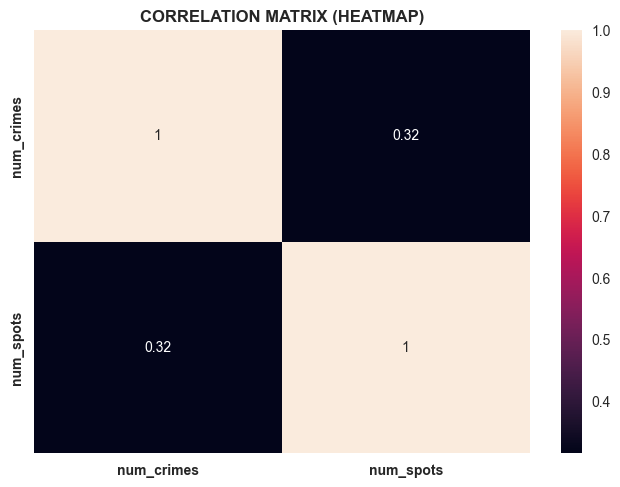

In [67]:
# MATRIX CORRELATION (HEATMAP)

import seaborn as sns 

# Heatmap
sns.heatmap(corr,annot=True)
plt.title('CORRELATION MATRIX (HEATMAP)',fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()
plt.show()

---